# TRAY EDA
> - There are thousands of SAAS products on the market
> - Algorithmically predict the ones who are going to generate more interest and traffic
> - Proactively create integrations for the unicorns

Looking for a model that gives them a strategy that they can tinker with and upgrade

Interpretability is KEY

Data is not totally random, it is invented but there is some statistical reasons for the choices

## Import and clean

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('../raw_data/Tray - SaaS products.xlsx', sheet_name=None)

In [4]:
df['csvjson (1)']

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Competitive gap,Organic Search Volume,SEO Value (0 - 3)
0,15Five,0,1,3,False,False,1161,2
1,1Password,5,1,0,True,False,395,2
2,2Checkout,1,1,0,True,False,317,2
3,6sense,3,2,3,True,False,1145,2
4,ActivTrak,2,5,3,False,False,996,2
...,...,...,...,...,...,...,...,...
194,WorkRamp,0,4,5,True,False,598,3
195,XANT,1,1,1,False,False,1422,3
196,Yesware,3,5,4,False,False,456,1
197,Zapier,0,4,1,True,False,387,2


In [5]:
df = df['csvjson (1)']

In [6]:
df.isnull().sum()

API                      0
Analyst value (0 - 5)    0
Partner value (0 - 5)    0
Persona value (0 - 5)    0
Growing market           0
Competitive gap          0
Organic Search Volume    0
SEO Value (0 - 3)        0
dtype: int64

### Drop Competitive gap

In [7]:
df['Competitive gap'].nunique()

1

In [7]:
# Competitive gap only has False values so should be dropped
df = df.drop(columns='Competitive gap')

In [8]:
df

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3)
0,15Five,0,1,3,False,1161,2
1,1Password,5,1,0,True,395,2
2,2Checkout,1,1,0,True,317,2
3,6sense,3,2,3,True,1145,2
4,ActivTrak,2,5,3,False,996,2
...,...,...,...,...,...,...,...
194,WorkRamp,0,4,5,True,598,3
195,XANT,1,1,1,False,1422,3
196,Yesware,3,5,4,False,456,1
197,Zapier,0,4,1,True,387,2


### Check for OSV zeros
*Could these be outliers due to Non Organic seach volume? We lack key information on the behaviour of these SaaS (you could be just lacking information*

If company still has high persona value then maybe should be kept!!

In [9]:
(df['Organic Search Volume'] == 0).astype(int).sum()

48

#### Eliminate All zero OSV

In [10]:
index = (df['Organic Search Volume'] == 0).astype(int)
boolean = df.set_index(index)
boolean.loc[1]

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3)
Organic Search Volume,,,,,,,
1,Agiloft,1,0,0,True,0,0
1,Aplos,4,2,2,False,0,0
1,AppZen,1,0,2,False,0,0
1,ArchiveSocial,2,4,3,False,0,0
1,beekeeper,4,0,4,True,0,0
1,BigTime,4,0,3,False,0,0
1,Bitnami,0,4,4,True,0,0
1,Chorus.ai,2,4,5,True,0,0
1,ChurnZero,1,0,5,True,0,0


In [11]:
boolean.loc[1].shape

(48, 7)

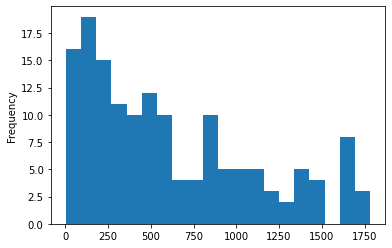

In [12]:
boolean.loc[0]['Organic Search Volume'].plot.hist(bins=20);

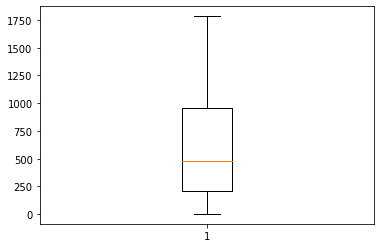

In [13]:
plt.boxplot(boolean.loc[0]['Organic Search Volume']);

<AxesSubplot:ylabel='Frequency'>

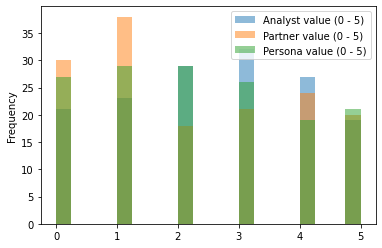

In [14]:
boolean.loc[0][['Analyst value (0 - 5)','Partner value (0 - 5)','Persona value (0 - 5)']].plot.hist(bins=20, alpha=0.5)

#### Eliminate zero score + above 4 Persona Value

In [15]:
mask = df['Organic Search Volume'] > 0
df[mask]

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3)
0,15Five,0,1,3,False,1161,2
1,1Password,5,1,0,True,395,2
2,2Checkout,1,1,0,True,317,2
3,6sense,3,2,3,True,1145,2
4,ActivTrak,2,5,3,False,996,2
...,...,...,...,...,...,...,...
194,WorkRamp,0,4,5,True,598,3
195,XANT,1,1,1,False,1422,3
196,Yesware,3,5,4,False,456,1
197,Zapier,0,4,1,True,387,2


In [16]:
mask_1 = df['Organic Search Volume'] > 0
mask_2 = df['Persona value (0 - 5)'] > 3
mask_3 = np.logical_or(mask_1, mask_2)
df[mask_3].shape

(167, 7)

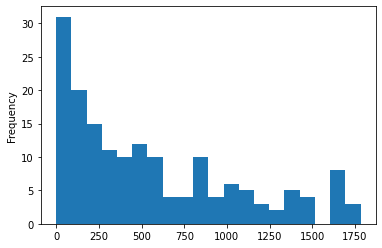

In [17]:
df[mask_3]['Organic Search Volume'].plot.hist(bins=20);

Lets run with this assumption that zero organic traffic sites require more information to be considered in this model (non-organic traffic info or SEO values OR information on new-user sign-ups for onboarding info)

In [18]:
# df = df[mask_3]

### Scale + Encode

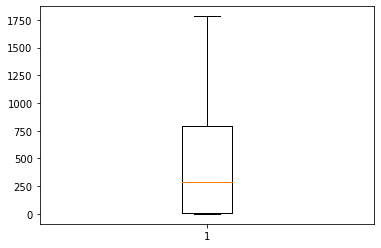

In [19]:
plt.boxplot(df['Organic Search Volume']);

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Organic Search Volume']])
df['Organic Search Volume'] = scaler.transform(df[['Organic Search Volume']])

In [21]:
df.head()

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3)
0,15Five,0,1,3,False,0.651150,2
1,1Password,5,1,0,True,0.221537,2
2,2Checkout,1,1,0,True,0.177790,2
3,6sense,3,2,3,True,0.642176,2
4,ActivTrak,2,5,3,False,0.558609,2


In [22]:
# Turn Growing market into 1s and 0s
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, drop='first')
enc.fit(df[['Growing market']])
enc.categories_

[array([False,  True])]

In [23]:
df['Growing market'] = enc.transform(df[['Growing market']])

In [24]:
df.head()

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3)
0,15Five,0,1,3,0.0,0.651150,2
1,1Password,5,1,0,1.0,0.221537,2
2,2Checkout,1,1,0,1.0,0.177790,2
3,6sense,3,2,3,1.0,0.642176,2
4,ActivTrak,2,5,3,0.0,0.558609,2


In [25]:
scaler = MinMaxScaler()
scaler.fit(df[['Analyst value (0 - 5)']])
df['Analyst value (0 - 5)'] = scaler.transform(df[['Analyst value (0 - 5)']])
df['Partner value (0 - 5)'] = scaler.transform(df[['Partner value (0 - 5)']])
df['Persona value (0 - 5)'] = scaler.transform(df[['Persona value (0 - 5)']])

In [26]:
scaler = MinMaxScaler()
scaler.fit(df[['SEO Value (0 - 3)']])
df['SEO Value (0 - 3)'] = scaler.transform(df[['SEO Value (0 - 3)']])

In [27]:
df.head()

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3)
0,15Five,0.0,0.2,0.6,0.0,0.651150,0.666667
1,1Password,1.0,0.2,0.0,1.0,0.221537,0.666667
2,2Checkout,0.2,0.2,0.0,1.0,0.177790,0.666667
3,6sense,0.6,0.4,0.6,1.0,0.642176,0.666667
4,ActivTrak,0.4,1.0,0.6,0.0,0.558609,0.666667


## Corrolations

### Pearson Corrolation

Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

Pearson’s correlation requires that each dataset be normally distributed.

In [28]:
from scipy.stats import pearsonr

In [29]:
# calculate Pearson's correlation between Organic Search Volume and Persona Value
corr, two_p_value = pearsonr(df['Organic Search Volume'], df['Persona value (0 - 5)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.051


In [30]:
# calculate Pearson's correlation between Organic Search Volume and SEO
corr, two_p_value = pearsonr(df['Organic Search Volume'], df['SEO Value (0 - 3)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.707


In [31]:
# calculate Pearson's correlation between Organic Search Volume and SEO
corr, two_p_value = pearsonr(df['Organic Search Volume'], df['Partner value (0 - 5)'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.127


### Spearman’s Correlation

Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))

Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.

In [32]:
from scipy.stats import spearmanr

In [33]:
# calculate Pearson's correlation between Organic Search Volume and Persona Value
corr, two_p_value = spearmanr(df['Organic Search Volume'], df['Persona value (0 - 5)'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.067


In [34]:
# calculate Pearson's correlation between Organic Search Volume and Persona Value
corr, two_p_value = spearmanr(df['Organic Search Volume'], df['SEO Value (0 - 3)'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.789


### Pairplot

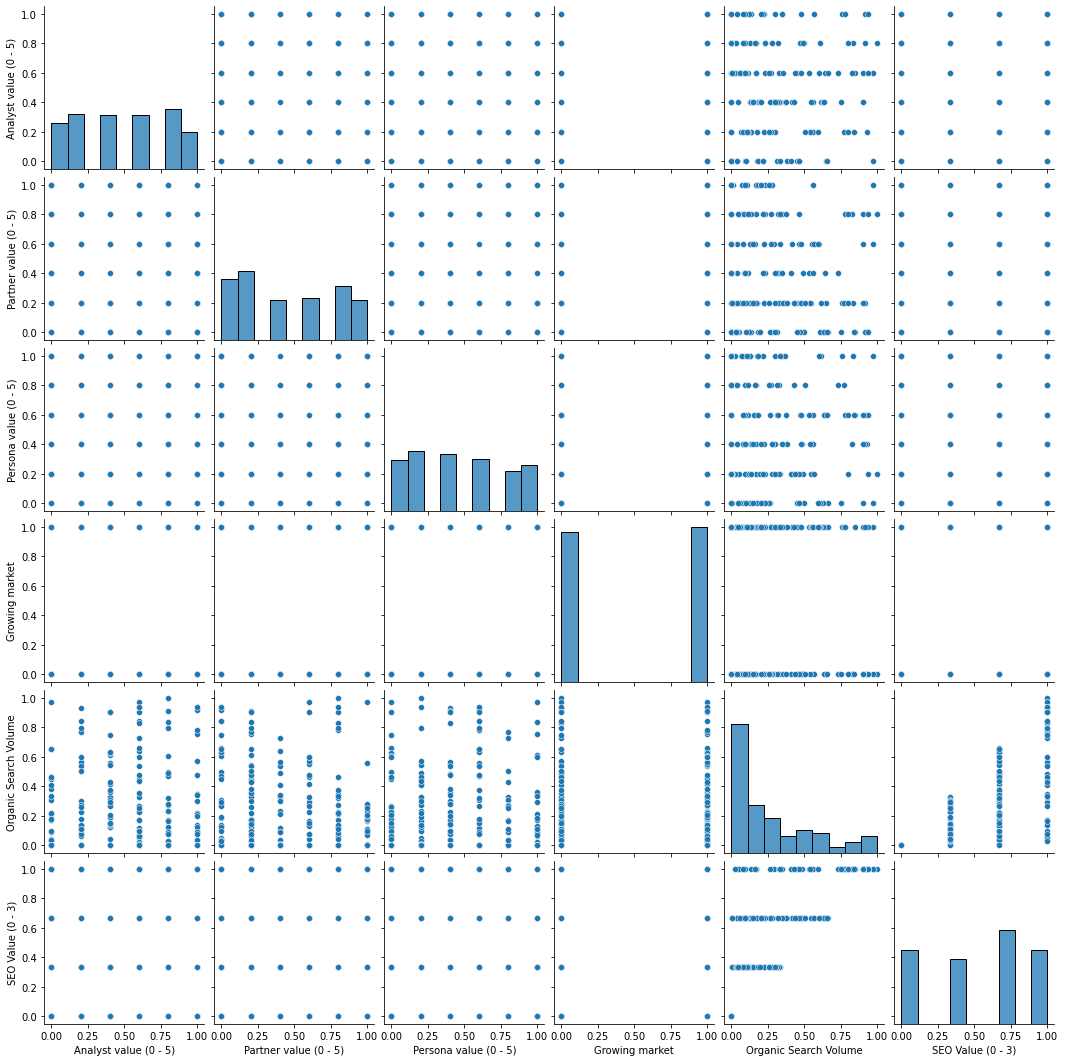

In [35]:
import seaborn as sns
sns.pairplot(data=df)

## Feature Engineer

What if we create a feature that takes into account traffic indicators (search volume and SEO Value) but also takes into account Persona value which from our clustering analysis showed to be Tray's currently most favoured feature for company selection?

In [36]:
# Standardizing them so none have naturally a bigger weight, but specific weights could be added
df['Unicorn Value'] =  0.5*df['Persona value (0 - 5)']
df['Unicorn Value'] += 0.25*df['SEO Value (0 - 3)']
df['Unicorn Value'] += 0.25*df['Organic Search Volume']
df['Unicorn Value'] += 0*df['Analyst value (0 - 5)']
df['Unicorn Value'] += 0*df['Partner value (0 - 5)']
df['Unicorn Value'] += 0*df['Growing market']
df

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3),Unicorn Value
0,15Five,0.0,0.2,0.6,0.0,0.651150,0.666667,0.629454
1,1Password,1.0,0.2,0.0,1.0,0.221537,0.666667,0.222051
2,2Checkout,0.2,0.2,0.0,1.0,0.177790,0.666667,0.211114
3,6sense,0.6,0.4,0.6,1.0,0.642176,0.666667,0.627211
4,ActivTrak,0.4,1.0,0.6,0.0,0.558609,0.666667,0.606319
...,...,...,...,...,...,...,...,...
194,WorkRamp,0.0,0.8,1.0,1.0,0.335390,1.000000,0.833847
195,XANT,0.2,0.2,0.2,0.0,0.797532,1.000000,0.549383
196,Yesware,0.6,1.0,0.8,0.0,0.255749,0.333333,0.547271
197,Zapier,0.0,0.8,0.2,1.0,0.217050,0.666667,0.320929


In [37]:
df.nlargest(3,'Unicorn Value')

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3),Unicorn Value
87,Highspot,0.6,1.0,1.0,1.0,0.971957,1.0,0.992989
10,Alteryx,0.8,0.2,1.0,0.0,0.836792,1.0,0.959198
36,casavi,1.0,0.2,1.0,1.0,0.757151,1.0,0.939288


In [38]:
df.nsmallest(3,'Unicorn Value')

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3),Unicorn Value
7,Agiloft,0.2,0.0,0.0,1.0,0.0,0.0,0.0
84,Gusto,0.2,0.8,0.0,1.0,0.0,0.0,0.0
168,Sumo Logic,0.2,0.4,0.0,0.0,0.0,0.0,0.0


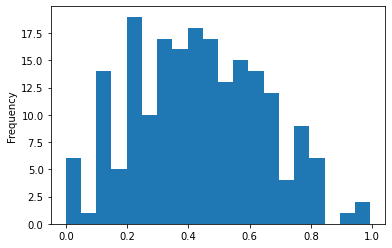

In [39]:
df['Unicorn Value'].plot.hist(bins=20);

Is achieving normal distribution in this case something we would want? These are supposed to be the top 200 SaaS companies in Forbes list or something like that, therefore shouldnt they all have relatively high scores?

## Linear Regression

In [49]:
from sklearn.model_selection import train_test_split
# Ready X and y
X = df[['Analyst value (0 - 5)']]
y = df['Unicorn Value']
# Split into Train/Test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
from sklearn.linear_model import LinearRegression
# Instanciate the model
model = LinearRegression()
# Train the model on the Training data
model.fit(X, y)
# Score the model on the Testing data
model.score(X, y)

0.0022066584618920526

In [51]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, X, y, cv=5)
# Scores
cv_results['test_score']
# Mean of scores
cv_results['test_score'].mean()

-0.0245704260977204

## Logistic Regression w/ actual used companies

In [8]:
actual = pd.read_csv('../raw_data/Tray_dataset.csv')

In [9]:
actual

,Unnamed: 0,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3),serving
0,0,15Five,0,1,3,False,1161,2,False
1,1,1Password,5,1,0,True,395,2,False
2,2,2Checkout,1,1,0,True,317,2,False
3,3,6sense,3,2,3,True,1145,2,False
4,4,ActivTrak,2,5,3,False,996,2,False
...,...,...,...,...,...,...,...,...,...
194,194,WorkRamp,0,4,5,True,598,3,False
195,195,XANT,1,1,1,False,1422,3,False
196,196,Yesware,3,5,4,False,456,1,False
197,197,Zapier,0,4,1,True,387,2,False


In [10]:
# minmax scale organic search volume
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(actual[['Organic Search Volume']])
actual['Organic Search Volume'] = scaler.transform(actual[['Organic Search Volume']])

In [11]:
# Turn Growing market into 1s and 0s
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, drop='first')
enc.fit(actual[['Growing market']])
actual['Growing market'] = enc.transform(actual[['Growing market']])

In [12]:
scaler = MinMaxScaler()
scaler.fit(actual[['Analyst value (0 - 5)']])
actual['Analyst value (0 - 5)'] = scaler.transform(actual[['Analyst value (0 - 5)']])
actual['Partner value (0 - 5)'] = scaler.transform(actual[['Partner value (0 - 5)']])
actual['Persona value (0 - 5)'] = scaler.transform(actual[['Persona value (0 - 5)']])

In [13]:
scaler = MinMaxScaler()
scaler.fit(actual[['SEO Value (0 - 3)']])
actual['SEO Value (0 - 3)'] = scaler.transform(actual[['SEO Value (0 - 3)']])

In [14]:
# Turn serving into 1s and 0s
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, drop='first')
enc.fit(actual[['serving']])
actual['serving'] = enc.transform(actual[['serving']])

In [15]:
actual = actual.drop(columns=['Unnamed: 0'])
actual.head()

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3),serving
0,15Five,0.0,0.2,0.6,0.0,0.651150,0.666667,0.0
1,1Password,1.0,0.2,0.0,1.0,0.221537,0.666667,0.0
2,2Checkout,0.2,0.2,0.0,1.0,0.177790,0.666667,0.0
3,6sense,0.6,0.4,0.6,1.0,0.642176,0.666667,0.0
4,ActivTrak,0.4,1.0,0.6,0.0,0.558609,0.666667,0.0


In [16]:
from sklearn.model_selection import train_test_split
# Ready X and y
X = actual.drop(columns=['API','serving'])
y = actual['serving']
# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
model.score(X_test,y_test)

0.95

In [19]:
model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

Of course the model is having such a high accuracy when it simply predicts False every time and out of shear probability thats what its gonna be...

In [20]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [21]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, X, y, cv=5, scoring=('recall','accuracy', 'precision'))
# Scores
cv_results
# Mean of scores
#cv_results['test_score'].mean()

/home/diego/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/diego/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/diego/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/diego/.pyenv/ver

{'fit_time': array([0.01399946, 0.00848198, 0.00962853, 0.0094223 , 0.01686382]),
 'score_time': array([0.00811267, 0.00389051, 0.00398254, 0.00380445, 0.01153827]),
 'test_recall': array([0., 0., 0., 0., 0.]),
 'test_accuracy': array([0.825     , 0.825     , 0.825     , 0.825     , 0.84615385]),
 'test_precision': array([0., 0., 0., 0., 0.])}

In [22]:
cv_results

{'fit_time': array([0.01399946, 0.00848198, 0.00962853, 0.0094223 , 0.01686382]),
 'score_time': array([0.00811267, 0.00389051, 0.00398254, 0.00380445, 0.01153827]),
 'test_recall': array([0., 0., 0., 0., 0.]),
 'test_accuracy': array([0.825     , 0.825     , 0.825     , 0.825     , 0.84615385]),
 'test_precision': array([0., 0., 0., 0., 0.])}

## Cluster Logic

Recommnded: K-mean clustering model will allow to accurately look at ALL features for each new API. If too much work then this can be turned into a simplified logic as seen below:

In [ ]:
# Seudo code
# Current threshsold logic:
## if df['Persona Value (0-5)'] >= 3: incorporate SaaS API
## else df['Analyst Value (0-5)'] >= 4 and df['SEO'] >= 2: incorporate SaaS API
# WE SUGGEST MANTAING THAT LOGIC (accelerating high analyst value api's) AND INCORPORATING THE FOLLOWING
# New target threshold logic:
## elif df['Partner Value (0-5)'] >= 4 and df['Analyst Value (0-5)'] >= 3
## elif 

## Companies that should be taken into account

In [31]:
actual

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3),serving,Condition 1,Condition 2,Condition 3
0,15Five,0.0,0.2,0.6,0.0,0.651150,0.666667,0.0,1,0,0
1,1Password,1.0,0.2,0.0,1.0,0.221537,0.666667,0.0,0,1,0
2,2Checkout,0.2,0.2,0.0,1.0,0.177790,0.666667,0.0,0,0,0
3,6sense,0.6,0.4,0.6,1.0,0.642176,0.666667,0.0,1,0,0
4,ActivTrak,0.4,1.0,0.6,0.0,0.558609,0.666667,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
194,WorkRamp,0.0,0.8,1.0,1.0,0.335390,1.000000,0.0,1,0,0
195,XANT,0.2,0.2,0.2,0.0,0.797532,1.000000,0.0,0,0,0
196,Yesware,0.6,1.0,0.8,0.0,0.255749,0.333333,0.0,1,0,0
197,Zapier,0.0,0.8,0.2,1.0,0.217050,0.666667,0.0,0,0,0


In [33]:
condition_1 = []
condition_2 = []
condition_3 = []
for index, row in actual.iterrows():
    if row['Persona value (0 - 5)'] >= 0.6:
        condition_1.append(1)
        condition_2.append(0)
        condition_3.append(0)
    elif row['Analyst value (0 - 5)'] >= 0.8 and row['SEO Value (0 - 3)'] >= 0.6:
        condition_1.append(0)
        condition_2.append(1)
        condition_3.append(0)
    elif row['Partner value (0 - 5)'] >= 0.8 and row['Analyst value (0 - 5)'] >= 0.6 and row['SEO Value (0 - 3)'] >= 0.6:
        condition_1.append(0)
        condition_2.append(0)
        condition_3.append(1)
    else:
        condition_1.append(0)
        condition_2.append(0)
        condition_3.append(0)

In [34]:
actual['Condition 1'] = condition_1
actual['Condition 2'] = condition_2
actual['Condition 3'] = condition_3
actual

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3),serving,Condition 1,Condition 2,Condition 3
0,15Five,0.0,0.2,0.6,0.0,0.651150,0.666667,0.0,1,0,0
1,1Password,1.0,0.2,0.0,1.0,0.221537,0.666667,0.0,0,1,0
2,2Checkout,0.2,0.2,0.0,1.0,0.177790,0.666667,0.0,0,0,0
3,6sense,0.6,0.4,0.6,1.0,0.642176,0.666667,0.0,1,0,0
4,ActivTrak,0.4,1.0,0.6,0.0,0.558609,0.666667,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
194,WorkRamp,0.0,0.8,1.0,1.0,0.335390,1.000000,0.0,1,0,0
195,XANT,0.2,0.2,0.2,0.0,0.797532,1.000000,0.0,0,0,0
196,Yesware,0.6,1.0,0.8,0.0,0.255749,0.333333,0.0,1,0,0
197,Zapier,0.0,0.8,0.2,1.0,0.217050,0.666667,0.0,0,0,0


In [35]:
actual[actual['Condition 3'] == 1]

,API,Analyst value (0 - 5),Partner value (0 - 5),Persona value (0 - 5),Growing market,Organic Search Volume,SEO Value (0 - 3),serving,Condition 1,Condition 2,Condition 3
37,Celoxis,0.6,1.0,0.0,1.0,0.267527,1.000000,0.0,0,0,1
53,Customer.io,0.6,0.8,0.0,0.0,0.054964,1.000000,0.0,0,0,1
91,join.com,0.6,0.8,0.4,0.0,0.825575,1.000000,0.0,0,0,1
108,Livestorm,0.6,0.8,0.0,1.0,0.900168,1.000000,0.0,0,0,1
176,Travis CI,0.6,0.8,0.0,1.0,0.227706,0.666667,0.0,0,0,1
184,Vectorworks,0.6,1.0,0.4,0.0,0.094784,0.666667,0.0,0,0,1
